In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
import math

In [2]:
path = "/eos/uscms/store/user/jennetd/smart-pixels/parquet/shuffled/dataset_3sr_16x16_50x12P5_parquets/test_contained/part.80.parquet"
df = pd.read_parquet(path)

In [3]:
# Size of pixel array
len_xy = 16 * 16
# Select last time slice
# Use these columns
col_indices = np.arange(0,5120).astype(str)

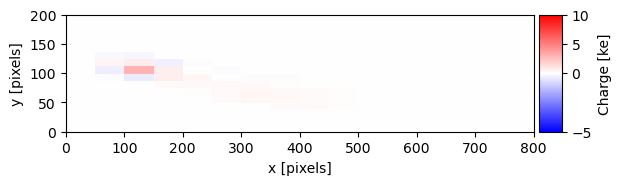

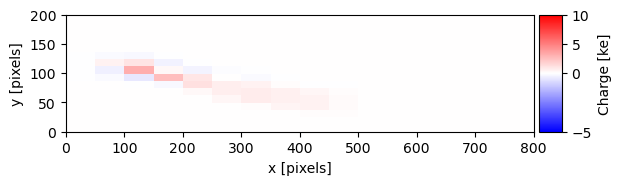

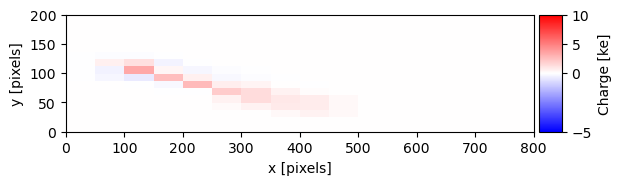

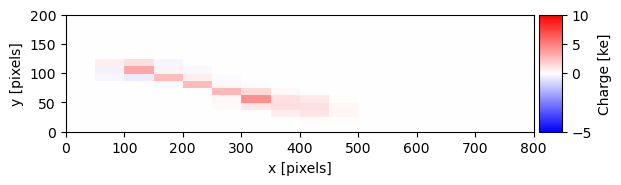

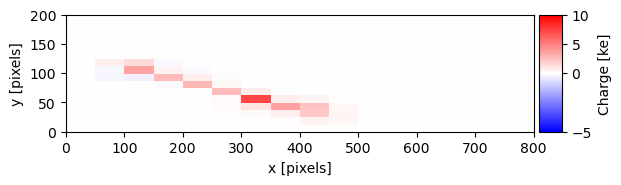

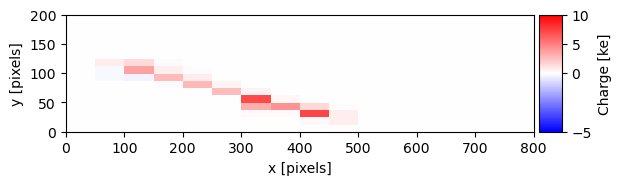

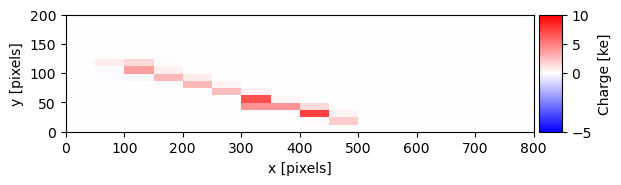

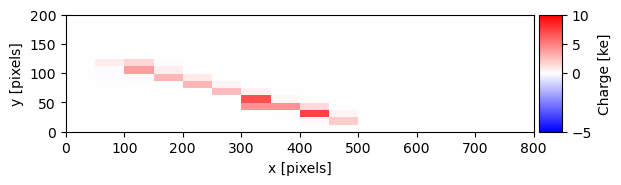

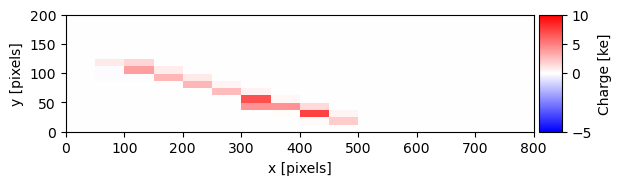

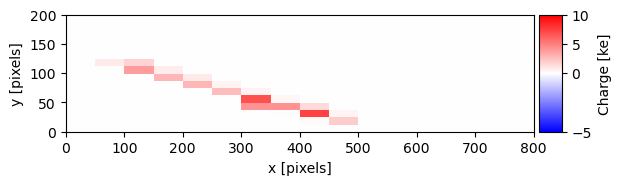

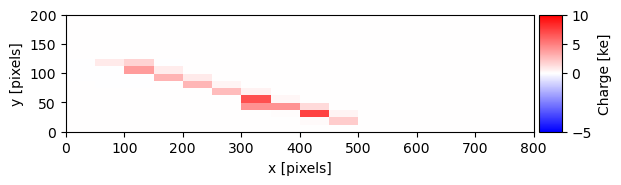

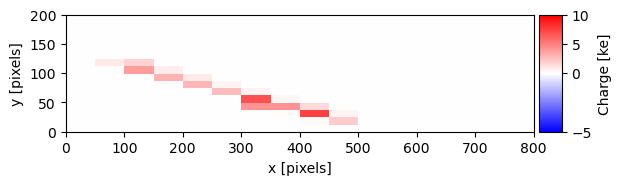

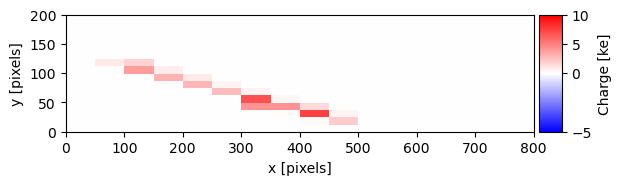

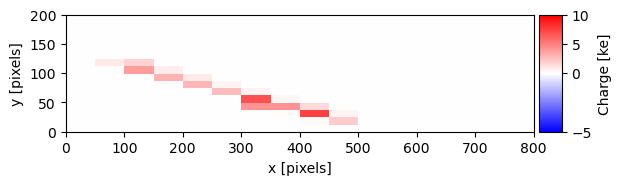

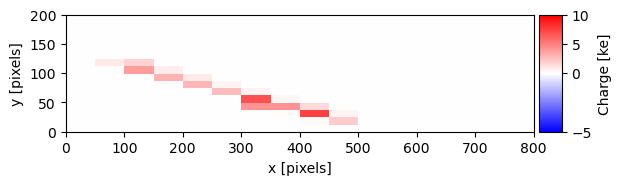

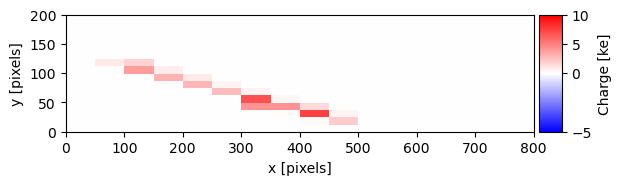

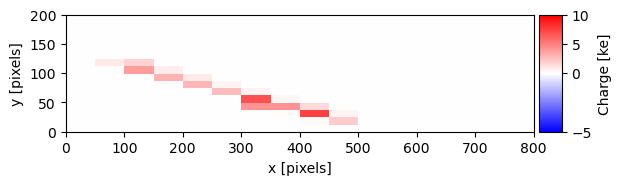

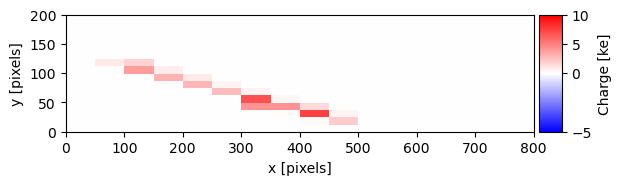

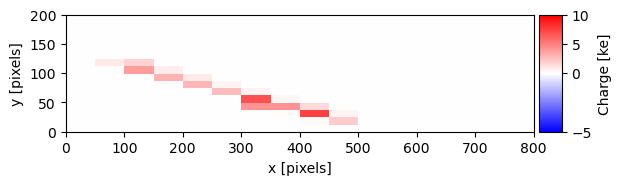

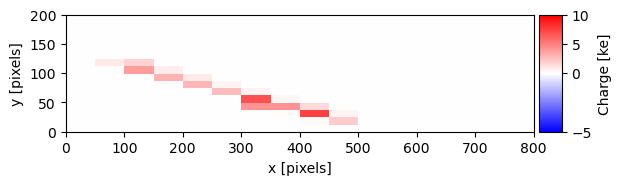

In [4]:
divnorm=colors.TwoSlopeNorm(vmin=-5., vcenter=0, vmax=10)

index = 6
a = (df[col_indices].loc[index].values).reshape(20,16,16)

for i in range(0,20):
    fig, ax = plt.subplots(1,1)
    im = ax.imshow(a[i,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm, extent=(0,16*50,0,16*12.5))
    #im.set_clim(-1,8)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
   
    plt.colorbar(im, cax = cax, label='Charge [ke]')
    ax.set_xlabel('x [pixels]')
    ax.set_ylabel('y [pixels]')
    
    fig.savefig('plots/image_'+str(i)+'.pdf',bbox_inches='tight')
    plt.show()  

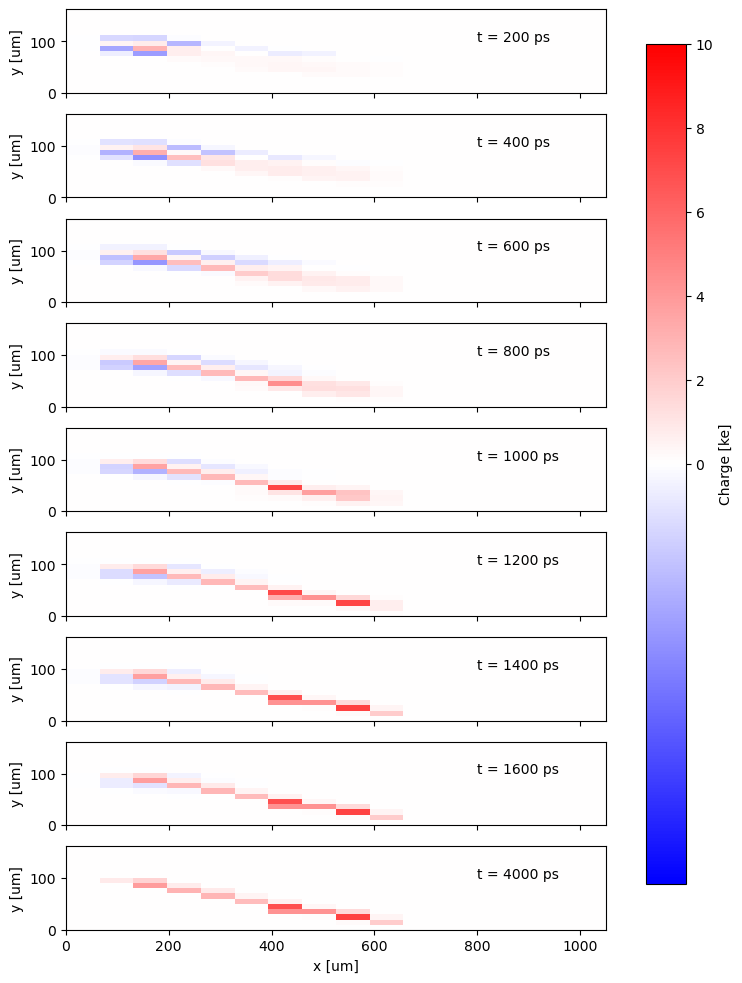

In [14]:
divnorm=colors.TwoSlopeNorm(vmin=-1., vcenter=0., vmax=10)

word = ['t = 200 ps', 
        't = 400 ps', 
        't = 600 ps', 
        't = 800 ps', 
        't = 1000 ps', 
        't = 1200 ps', 
        't = 1400 ps', 
        't = 1600 ps', 
        't = 4000 ps']

fig, ax = plt.subplots(9,1,figsize=(8,12),sharex=True,sharey=True)

for i in range(0,8):
    
    
    im = ax[i].imshow(a[i,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm,extent=(0,21*50,0,13*12.5))
    #im.set_clim(-1,8.5)
    ax[i].set_ylabel('y [um]')
    ax[i].text(800,100,word[i])

im = ax[8].imshow(a[-1,:,:]/1000,origin='lower',cmap='bwr',norm=divnorm,extent=(0,21*50,0,13*12.5))
#im.set_clim(-1,8.5)
ax[8].set_xlabel('x [um]')
ax[8].set_ylabel('y [um]')
ax[8].text(800,100,word[8])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Charge [ke]')

    
fig.savefig('plots/image_oneplot.png',bbox_inches='tight')
fig.savefig('plots/image_oneplot.pdf',bbox_inches='tight')
plt.show() 